## Exploring the Legacy Survey DR5 imaging catalog

In [5]:
import sys
import numpy as np 
import corner as DFM
from pydl.pydlutils.spheregroup import spherematch
# -- local -- 
fbgs_path = os.path.abspath(os.path.join('..'))
if fbgs_path not in sys.path: sys.path.append(fbgs_path)
from feasibgs import util as UT
from feasibgs import catalogs as Cat
from ChangTools.fitstables import mrdfits

In [6]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Read in Legacy data

In [7]:
legacy = mrdfits(UT.dat_dir()+'survey-bricks-dr5.fits.gz')

In [8]:
print 'colums in survey-bricks-dr5.fits.gz'
print sorted(legacy.__dict__.keys())
print '>>>> ', len(legacy.ra)

colums in survey-bricks-dr5.fits.gz
['brickname', 'dec', 'ebv', 'ext_g', 'ext_r', 'ext_w1', 'ext_w2', 'ext_w3', 'ext_w4', 'ext_z', 'galdepth_g', 'galdepth_r', 'galdepth_z', 'ncomp', 'ndev', 'nexp', 'nexp_g', 'nexp_r', 'nexp_z', 'nexphist_g', 'nexphist_r', 'nexphist_z', 'nobjs', 'npsf', 'nrex', 'nsimp', 'psfdepth_g', 'psfdepth_r', 'psfdepth_z', 'psfsize_g', 'psfsize_r', 'psfsize_z', 'ra', 'trans_g', 'trans_r', 'trans_wise', 'trans_z', 'wise_nobs']
>>>>  176811


In [9]:
sweep = mrdfits(UT.dat_dir()+'sweep-210m005-220p000.fits')

In [10]:
print 'colums in sweep-210m005-220p000.fits'
print sorted(sweep.__dict__.keys())
print '>>>> ', len(sweep.ra)

colums in sweep-210m005-220p000.fits
['allmask_g', 'allmask_i', 'allmask_r', 'allmask_u', 'allmask_y', 'allmask_z', 'anymask_g', 'anymask_i', 'anymask_r', 'anymask_u', 'anymask_y', 'anymask_z', 'brickid', 'brickname', 'dchisq', 'dec', 'dec_ivar', 'ebv', 'flux_g', 'flux_i', 'flux_ivar_g', 'flux_ivar_i', 'flux_ivar_r', 'flux_ivar_u', 'flux_ivar_w1', 'flux_ivar_w2', 'flux_ivar_w3', 'flux_ivar_w4', 'flux_ivar_y', 'flux_ivar_z', 'flux_r', 'flux_u', 'flux_w1', 'flux_w2', 'flux_w3', 'flux_w4', 'flux_y', 'flux_z', 'fracdev', 'fracdev_ivar', 'fracflux_g', 'fracflux_i', 'fracflux_r', 'fracflux_u', 'fracflux_w1', 'fracflux_w2', 'fracflux_w3', 'fracflux_w4', 'fracflux_y', 'fracflux_z', 'fracin_g', 'fracin_i', 'fracin_r', 'fracin_u', 'fracin_y', 'fracin_z', 'fracmasked_g', 'fracmasked_i', 'fracmasked_r', 'fracmasked_u', 'fracmasked_y', 'fracmasked_z', 'galdepth_g', 'galdepth_i', 'galdepth_r', 'galdepth_u', 'galdepth_y', 'galdepth_z', 'mw_transmission_g', 'mw_transmission_i', 'mw_transmission_r', 'm

In [11]:
tractor = mrdfits(UT.dat_dir()+'tractor-2101m005.fits')

In [12]:
print 'colums in tractor-2101m005.fits'
print sorted(tractor.__dict__.keys())
print '>>>> ', len(tractor.ra)
print '>>>> ', tractor.ra.min(), tractor.ra.max()
print '>>>> ', tractor.dec.min(), tractor.dec.max()

colums in tractor-2101m005.fits
['allmask_g', 'allmask_i', 'allmask_r', 'allmask_u', 'allmask_y', 'allmask_z', 'anymask_g', 'anymask_i', 'anymask_r', 'anymask_u', 'anymask_y', 'anymask_z', 'apflux_g', 'apflux_i', 'apflux_ivar_g', 'apflux_ivar_i', 'apflux_ivar_r', 'apflux_ivar_u', 'apflux_ivar_y', 'apflux_ivar_z', 'apflux_r', 'apflux_resid_g', 'apflux_resid_i', 'apflux_resid_r', 'apflux_resid_u', 'apflux_resid_y', 'apflux_resid_z', 'apflux_u', 'apflux_y', 'apflux_z', 'brick_primary', 'brickid', 'brickname', 'bx', 'by', 'dchisq', 'dec', 'dec_ivar', 'ebv', 'flux_g', 'flux_i', 'flux_ivar_g', 'flux_ivar_i', 'flux_ivar_r', 'flux_ivar_u', 'flux_ivar_w1', 'flux_ivar_w2', 'flux_ivar_w3', 'flux_ivar_w4', 'flux_ivar_y', 'flux_ivar_z', 'flux_r', 'flux_u', 'flux_w1', 'flux_w2', 'flux_w3', 'flux_w4', 'flux_y', 'flux_z', 'fracdev', 'fracdev_ivar', 'fracflux_g', 'fracflux_i', 'fracflux_r', 'fracflux_u', 'fracflux_w1', 'fracflux_w2', 'fracflux_w3', 'fracflux_w4', 'fracflux_y', 'fracflux_z', 'fracin_g',

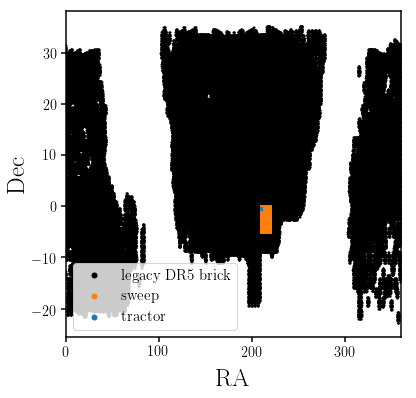

In [13]:
fig = plt.figure(figsize=(6,6))
bkgd = fig.add_subplot(111, frameon=False)
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel('RA', labelpad=10, fontsize=25)
bkgd.set_ylabel('Dec', labelpad=10, fontsize=25)

sub = fig.add_subplot(111)
sub.scatter(legacy.ra, legacy.dec, c='k', s=1, label='legacy DR5 brick')
sub.scatter(sweep.ra[::10], sweep.dec[::10], c='C1', s=1, label='sweep')
sub.scatter(tractor.ra, tractor.dec, c='C0', s=1, label='tractor')
sub.set_xlim([0., 360.])
#sub.set_ylim([-4., 3.5])
sub.legend(loc='lower left', frameon=True, markerscale=5, prop={'size':15})

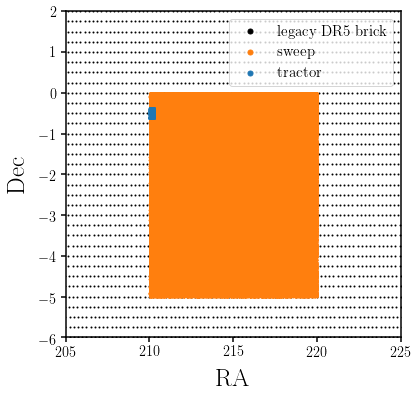

In [14]:
fig = plt.figure(figsize=(6,6))
bkgd = fig.add_subplot(111, frameon=False)
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel('RA', labelpad=10, fontsize=25)
bkgd.set_ylabel('Dec', labelpad=10, fontsize=25)

sub = fig.add_subplot(111)
sub.scatter(legacy.ra, legacy.dec, c='k', s=1, label='legacy DR5 brick')
sub.scatter(sweep.ra[::10], sweep.dec[::10], c='C1', s=1, label='sweep')
sub.scatter(tractor.ra, tractor.dec, c='C0', s=1, label='tractor')
sub.set_xlim([205., 225])
sub.set_ylim([-6., 2])
sub.legend(loc='upper right', frameon=True, markerscale=5, prop={'size':15})

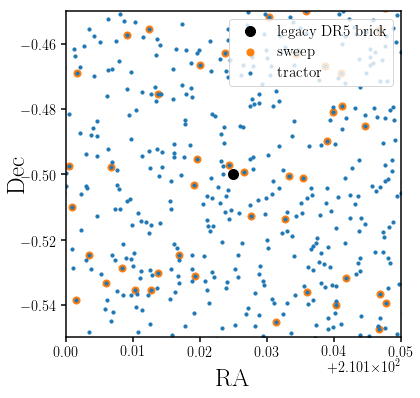

In [15]:
fig = plt.figure(figsize=(6,6))
bkgd = fig.add_subplot(111, frameon=False)
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel('RA', labelpad=10, fontsize=25)
bkgd.set_ylabel('Dec', labelpad=10, fontsize=25)

sub = fig.add_subplot(111)
sub.scatter(legacy.ra, legacy.dec, c='k', s=100, label='legacy DR5 brick')
sub.scatter(sweep.ra[::10], sweep.dec[::10], c='C1', s=50, label='sweep')
sub.scatter(tractor.ra, tractor.dec, c='C0', s=10, label='tractor')
sub.set_xlim([210.10, 210.15])
sub.set_ylim([-0.55, -0.45])
sub.legend(loc='upper right', frameon=True, prop={'size':15})

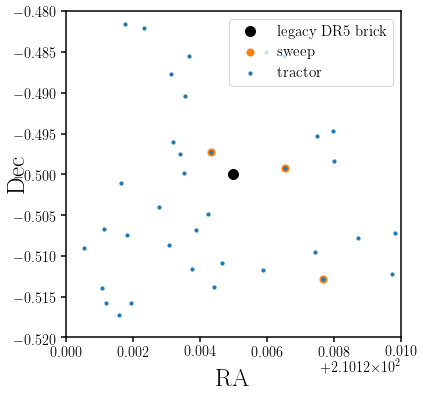

In [16]:
fig = plt.figure(figsize=(6,6))
bkgd = fig.add_subplot(111, frameon=False)
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel('RA', labelpad=10, fontsize=25)
bkgd.set_ylabel('Dec', labelpad=10, fontsize=25)

sub = fig.add_subplot(111)
sub.scatter(legacy.ra, legacy.dec, c='k', s=100, label='legacy DR5 brick')
sub.scatter(sweep.ra[::10], sweep.dec[::10], c='C1', s=50, label='sweep')
sub.scatter(tractor.ra[tractor.brick_primary], tractor.dec[tractor.brick_primary], c='C0', s=10, label='tractor')
sub.set_xlim([210.12, 210.13])
sub.set_ylim([-0.52, -0.48])
sub.legend(loc='upper right', frameon=True, prop={'size':15})

Lets see how this overlaps with the GAMA objects

In [17]:
gama = Cat.GAMA()
gama_data = gama.Read()

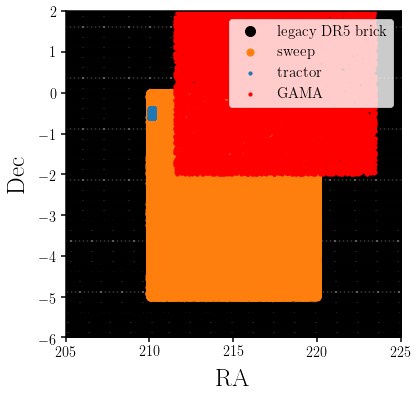

In [18]:
fig = plt.figure(figsize=(6,6))
bkgd = fig.add_subplot(111, frameon=False)
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel('RA', labelpad=10, fontsize=25)
bkgd.set_ylabel('Dec', labelpad=10, fontsize=25)

sub = fig.add_subplot(111)
sub.scatter(legacy.ra, legacy.dec, c='k', s=100, label='legacy DR5 brick')
sub.scatter(sweep.ra[::10], sweep.dec[::10], c='C1', s=50, label='sweep')
sub.scatter(tractor.ra[tractor.brick_primary], tractor.dec[tractor.brick_primary], c='C0', s=10, label='tractor')
sub.scatter(gama_data['photo']['ra'], gama_data['photo']['dec'], c='r', s=10, label='GAMA')
sub.set_xlim([205., 225])
sub.set_ylim([-6., 2])
sub.legend(loc='upper right', frameon=True, prop={'size':15})

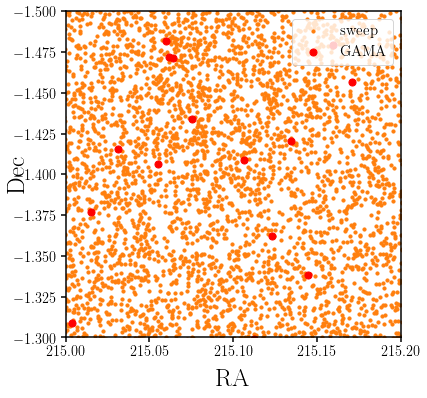

In [21]:
fig = plt.figure(figsize=(6,6))
bkgd = fig.add_subplot(111, frameon=False)
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel('RA', labelpad=10, fontsize=25)
bkgd.set_ylabel('Dec', labelpad=10, fontsize=25)

sub = fig.add_subplot(111)
sub.scatter(sweep.ra, sweep.dec, c='C1', s=10, label='sweep')
sub.scatter(gama_data['photo']['ra'], gama_data['photo']['dec'], c='r', s=10, label='GAMA')
sub.set_xlim([215., 215.2])
sub.set_ylim([-1.3, -1.5])
sub.legend(loc='upper right', frameon=True, prop={'size':15})

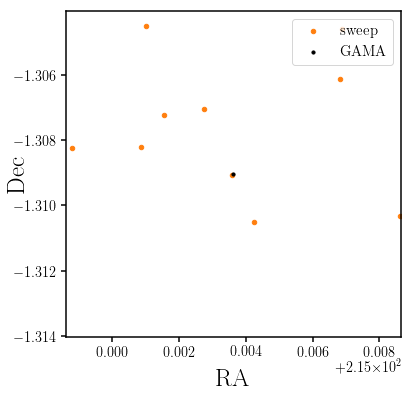

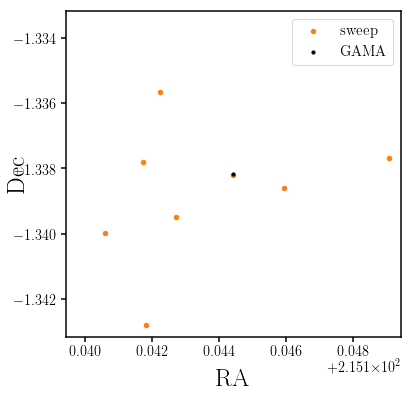

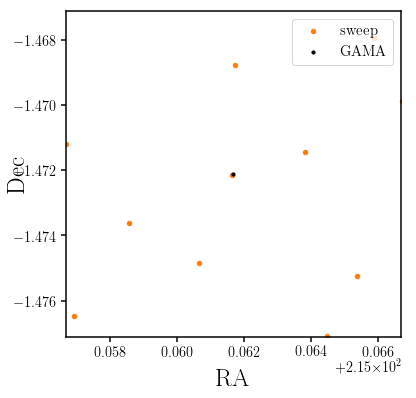

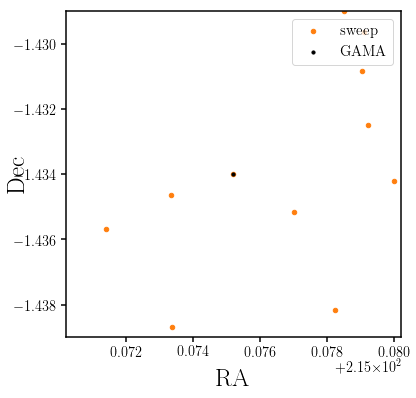

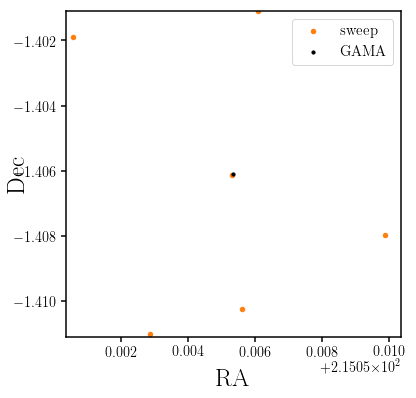

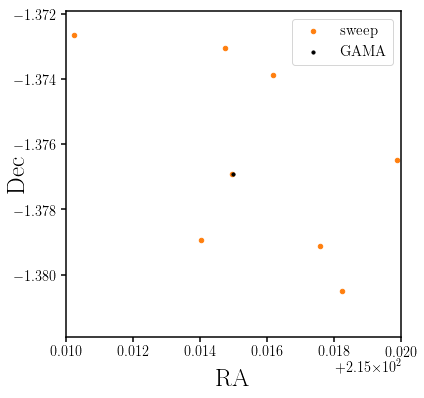

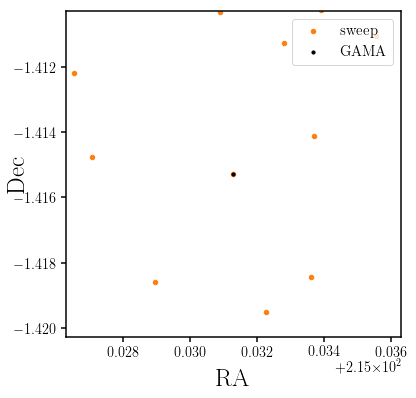

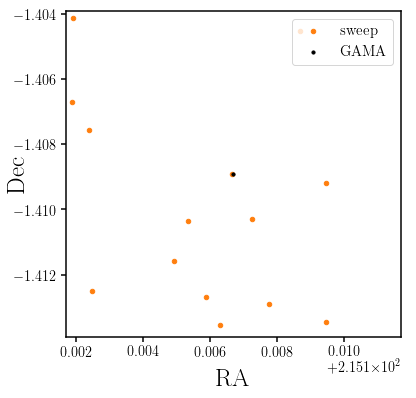

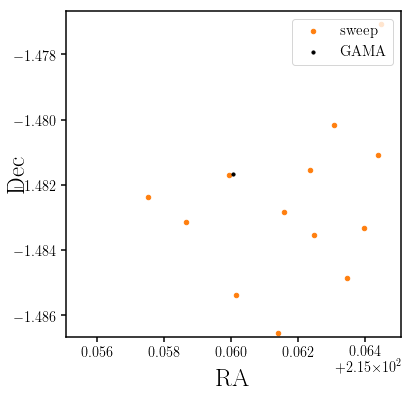

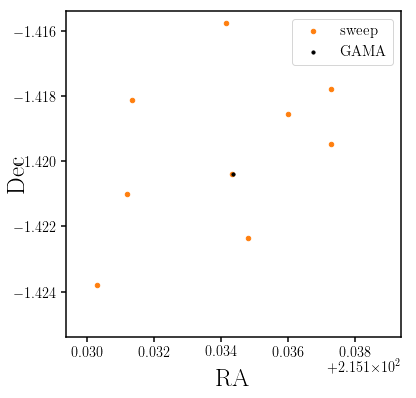

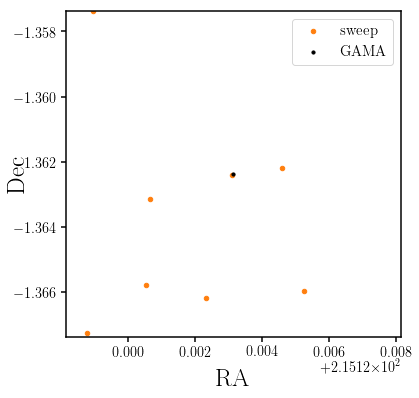

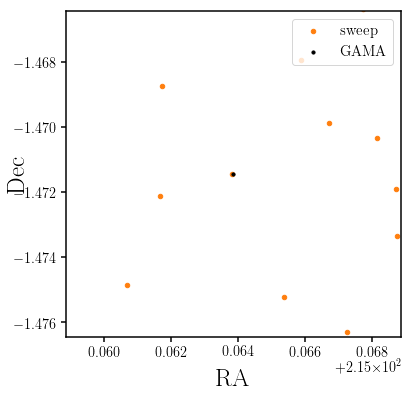

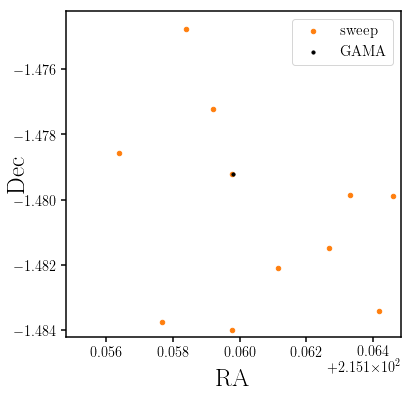

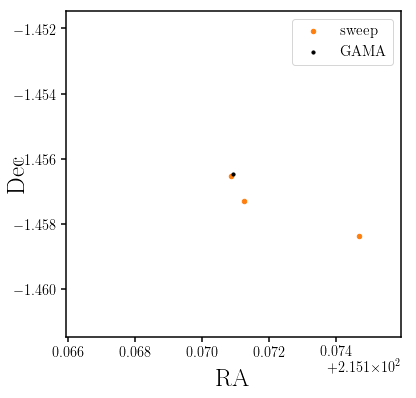

In [26]:
gama_radec_cut = (((gama_data['photo']['ra'] > 215.) & (gama_data['photo']['ra'] < 215.2)) & 
                  ((gama_data['photo']['dec'] > -1.5) & (gama_data['photo']['dec'] < -1.3)))
for i in range(np.sum(gama_radec_cut)): 
    fig = plt.figure(figsize=(6,6))
    bkgd = fig.add_subplot(111, frameon=False)
    bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    bkgd.set_xlabel('RA', labelpad=10, fontsize=25)
    bkgd.set_ylabel('Dec', labelpad=10, fontsize=25)

    sub = fig.add_subplot(111)
    sub.scatter(sweep.ra, sweep.dec, c='C1', s=20, label='sweep')
    gama_i_ra = gama_data['photo']['ra'][gama_radec_cut][i]
    gama_i_dec = gama_data['photo']['dec'][gama_radec_cut][i]
    sub.scatter([gama_i_ra], [gama_i_dec], c='k', s=10, label='GAMA')
    sub.set_xlim([gama_i_ra-0.005, gama_i_ra+0.005])
    sub.set_ylim([gama_i_dec-0.005, gama_i_dec+0.005])
    sub.legend(loc='upper right', frameon=True, prop={'size':15})
    plt.show()